# Chest x-ray Pneumonia Classification

# Importing Libraries

In [23]:
import numpy as np
#visulization library
import matplotlib.pyplot as plt
import seaborn as sns
#for report checking
from sklearn.metrics import confusion_matrix
#Cnn neural network
import tensorflow as tf

# # Assigning the train,test and validation imagest to a variables.

In [24]:
train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/val'

# Assigning the Img_height and img_width to a  variable

In [25]:
IMG_HEIGHT=224
IMG_WIDTH=224
BATCH_SIZE=32

# Creating Generator

In [26]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
rotation_range=20,
brightness_range=(1.2,1.5),
horizontal_flip=True)



test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)



val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)


In [27]:
train_data=train_datagen.flow_from_directory(
train_dir,
target_size=(IMG_HEIGHT,IMG_WIDTH),
class_mode='binary',
batch_size=BATCH_SIZE)

test_data=test_datagen.flow_from_directory(
test_dir,
target_size=(IMG_HEIGHT,IMG_WIDTH),
class_mode='binary',
batch_size=BATCH_SIZE)

val_data=val_datagen.flow_from_directory(
val_dir,
target_size=(IMG_HEIGHT,IMG_WIDTH),
class_mode='binary',
batch_size=BATCH_SIZE)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Building the Model

In [28]:
mobilenet=tf.keras.applications.MobileNetV2(
input_shape=(IMG_HEIGHT,IMG_WIDTH,3),
include_top=False,
weights='imagenet',
pooling="avg"

)
mobilenet.trainable=False

# EPOCHS

In [29]:
EPOCHS=50
inputs=tf.keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
pretrained_model=mobilenet(inputs,training=False)
dense=tf.keras.layers.Dense(1024,activation='relu')(pretrained_model)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(dense)
model=tf.keras.Model(inputs,outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 3,570,753
Trainable params: 1,312,769
Non-trainable params: 2,257,984
_________________________________________________________________
None


# Compiling the Model

In [30]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=[
                 'accuracy',
                 tf.keras.metrics.AUC(name='auc')
             ])

# Fitting the Model to the train and validation data

In [31]:
history=model.fit(train_data,
                 validation_data=val_data,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])

Epoch 1/50
163/163 [==============================] - 149s 896ms/step - loss: 0.1989 - accuracy: 0.9252 - auc: 0.9660 - val_loss: 0.2234 - val_accuracy: 0.8750 - val_auc: 1.0000
Epoch 2/50
163/163 [==============================] - 137s 839ms/step - loss: 0.1143 - accuracy: 0.9528 - auc: 0.9896 - val_loss: 0.2862 - val_accuracy: 0.8750 - val_auc: 1.0000
Epoch 3/50
163/163 [==============================] - 125s 764ms/step - loss: 0.1054 - accuracy: 0.9613 - auc: 0.9902 - val_loss: 0.2444 - val_accuracy: 0.8750 - val_auc: 1.0000
Epoch 4/50
163/163 [==============================] - 123s 752ms/step - loss: 0.0872 - accuracy: 0.9643 - auc: 0.9935 - val_loss: 0.0906 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 5/50
163/163 [==============================] - 123s 757ms/step - loss: 0.0977 - accuracy: 0.9624 - auc: 0.9919 - val_loss: 0.3723 - val_accuracy: 0.8125 - val_auc: 1.0000
Epoch 6/50
163/163 [==============================] - 123s 751ms/step - loss: 0.0813 - accuracy: 0.9693 - auc:

# Results

In [32]:
true_labels=test_data.labels

In [33]:
true_labels.sum()

390

In [34]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
pred_labels=np.squeeze(np.array(model.predict(test_data)>=0.5,dtype=np.int))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [36]:
model.predict(test_data)

array([[9.99996543e-01],
       [7.43947998e-02],
       [6.57070935e-01],
       [9.44625139e-02],
       [9.99214411e-01],
       [9.56475735e-01],
       [7.35276341e-02],
       [7.07909316e-02],
       [9.84029353e-01],
       [7.62241483e-01],
       [9.99919295e-01],
       [9.83260572e-01],
       [1.14729270e-01],
       [7.27952003e-01],
       [3.01823616e-01],
       [9.99368489e-01],
       [1.88211072e-03],
       [7.33523890e-02],
       [3.09599843e-02],
       [9.47990298e-01],
       [1.15008773e-02],
       [6.53612986e-02],
       [8.22687328e-01],
       [9.63481009e-01],
       [7.02118408e-03],
       [9.99768913e-01],
       [1.39094982e-02],
       [1.01880334e-01],
       [9.94411409e-01],
       [3.55667889e-01],
       [9.99705493e-01],
       [9.99996185e-01],
       [9.99983907e-01],
       [5.85298985e-03],
       [6.82026222e-02],
       [9.99906540e-01],
       [8.27796161e-01],
       [9.93933976e-01],
       [9.99760568e-01],
       [9.22432262e-03],


In [37]:
pred_labels.sum()

415

# Confusion Matrix

In [38]:
cm=confusion_matrix(true_labels,pred_labels)

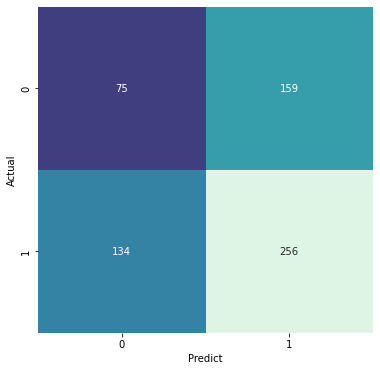

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='mako',cbar=False)
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()



In [40]:
result=model.evaluate(test_data,verbose=0)
print(result)

[0.2542564570903778, 0.9022436141967773, 0.9645737409591675]


In [41]:
pred_labels


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,